In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2sd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [3]:
os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [4]:
os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\train.csv', 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [5]:
# Check the number of images in the dataset
train = []
label = []


In [6]:
# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  for j in train_class:
    img = os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



In [7]:
train 

['C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0024cdab0c1e.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\00cb6555d108.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0124dffecf29.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\01b3aed3ed4c.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0369f3efe69b.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\03e25101e8e8.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\04ac765f91a1.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\059bc89df7f4.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\05a5183c92d0.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\0684311afdfc.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\06b71823f9cd.png',
 'C:\\Users\\Lenovo\\Downloads\\archive\\colored_images\\Mild\\07929d32b5b3.png',
 'C:\\Users\\Len

In [8]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

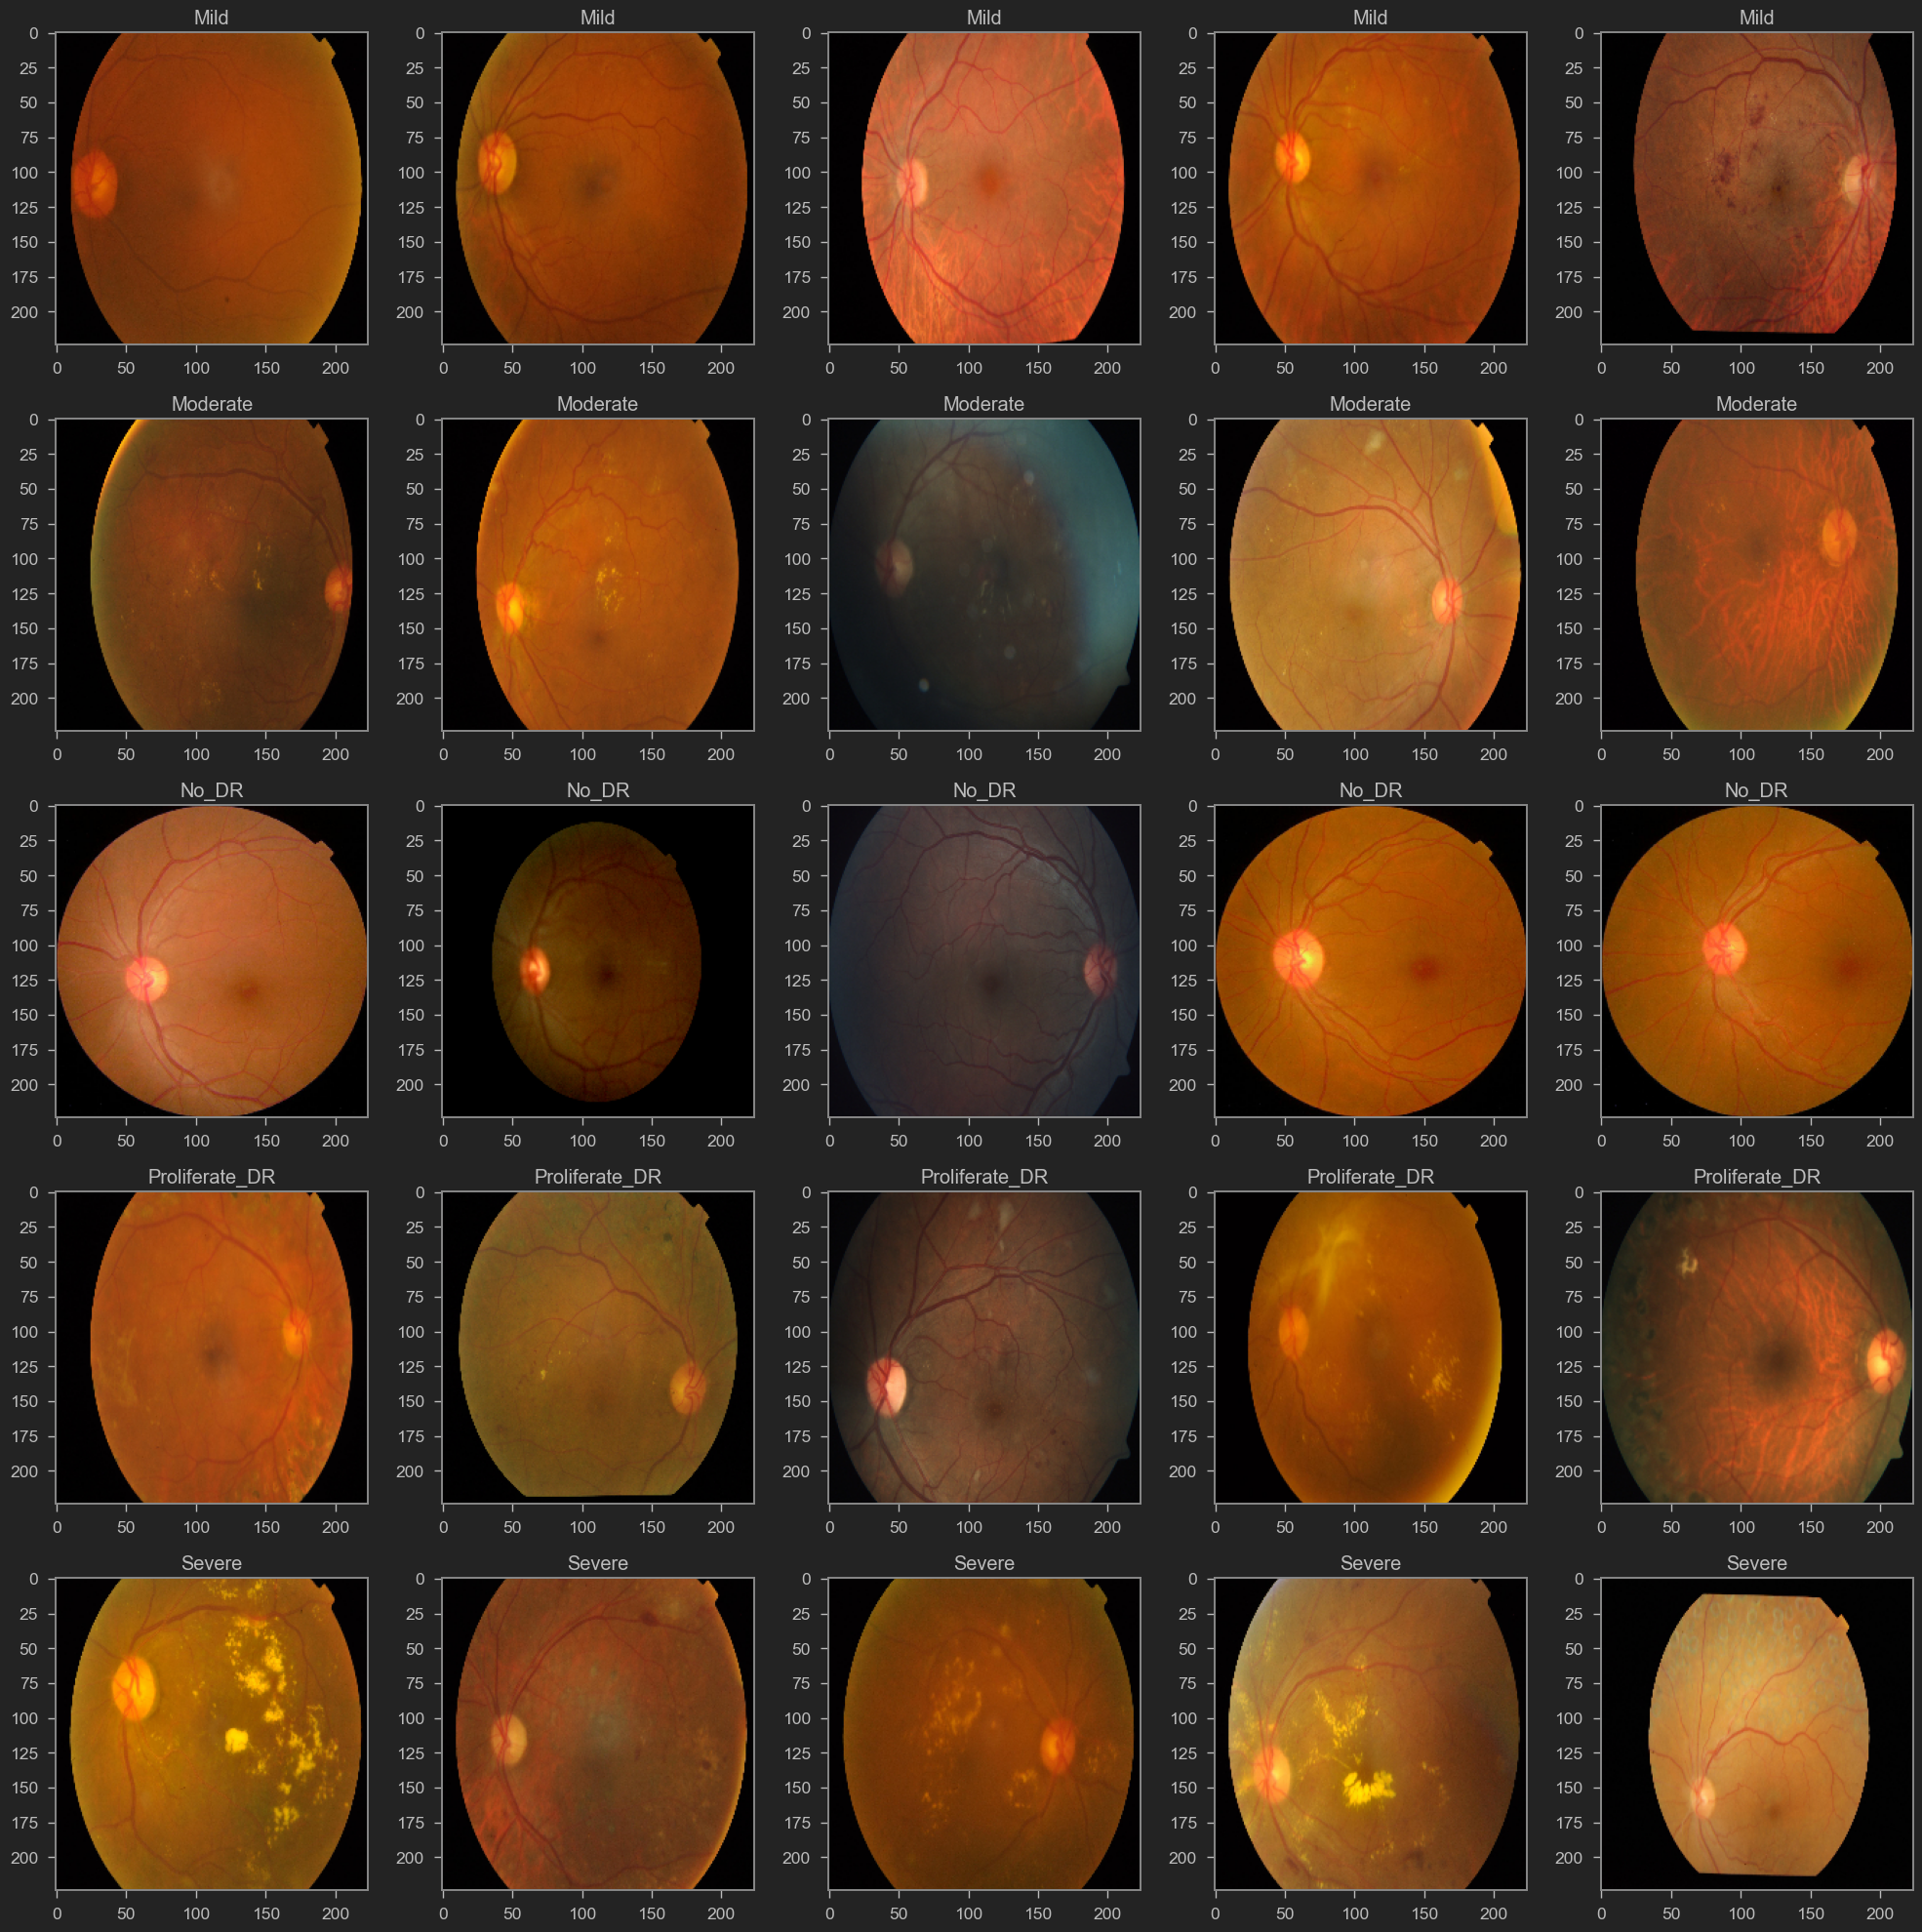

In [9]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Downloads\\archive\\colored_images', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [11]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image  Labels
0     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
1     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
2     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
3     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
4     C:\Users\Lenovo\Downloads\archive\colored_imag...    Mild
...                                                 ...     ...
3657  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3658  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3659  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3660  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe
3661  C:\Users\Lenovo\Downloads\archive\colored_imag...  Severe

[3662 rows x 2 columns]

In [12]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [13]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)# Creating datagenerator for training, validation and test dataset.



In [14]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [15]:

# Define the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [16]:
# Add custom top layers for diabetic retinopathy detection
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
    
])

In [17]:
# Freeze the layers of the MobileNetV2 base model
for layer in base_model.layers:
    layer.trainable = False


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 3574853 (13.64 MB)
Trainable params: 1316869 (5.02 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation lossmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [21]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 18, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/18
77/77 [==============================] - ETA: 0s - loss: 0.9216 - accuracy: 0.6949
Epoch 1: val_loss improved from inf to 0.72587, saving model to weights.hdf5


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 200s 3s/step - loss: 0.9216 - accuracy: 0.6949 - val_loss: 0.7259 - val_accuracy: 0.7692
Epoch 2/18
77/77 [==============================] - ETA: 0s - loss: 0.6258 - accuracy: 0.7604
Epoch 2: val_loss improved from 0.72587 to 0.63065, saving model to weights.hdf5
77/77 [==============================] - 150s 2s/step - loss: 0.6258 - accuracy: 0.7604 - val_loss: 0.6307 - val_accuracy: 0.7764
Epoch 3/18
77/77 [==============================] - ETA: 0s - loss: 0.5554 - accuracy: 0.7909
Epoch 3: val_loss did not improve from 0.63065
77/77 [==============================] - 141s 2s/step - loss: 0.5554 - accuracy: 0.7909 - val_loss: 0.6833 - val_accuracy: 0.7740
Epoch 4/18
77/77 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.7982
Epoch 4: val_loss did not improve from 0.63065
77/77 [==============================] - 143s 2s/step - loss: 0.5106 - accuracy: 0.7982 - val_loss: 0.6333 - val_accuracy: 0.7740
Epoch 5/18
77/77 [=====

In [23]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =2)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 - 20s - loss: 0.7079 - accuracy: 0.7955 - 20s/epoch - 905ms/step
Accuracy Test : 0.7954545617103577


In [24]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [25]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  #code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  #resizing the image to (256,256)
  img = img.resize((256,256))
  #appending image to the image list
  image.append(img)
  #converting image to array
  img = np.asarray(img, dtype= np.float32)
  #normalizing the image
  img = img / 255
  #reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  #making prediction of the model
  predict = model.predict(img)
  #getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #appending the predicted class to the list
  prediction.append(labels[predict])
  #appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 47ms/step


In [26]:


#Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.791268758526603


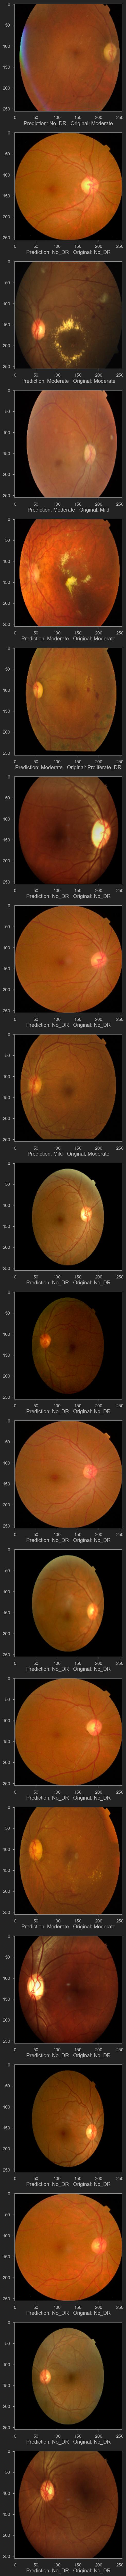

In [27]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [42]:
sns.countplot(label)

ValueError: could not convert string to float: 'Mild'

<function matplotlib.pyplot.show(close=None, block=None)>

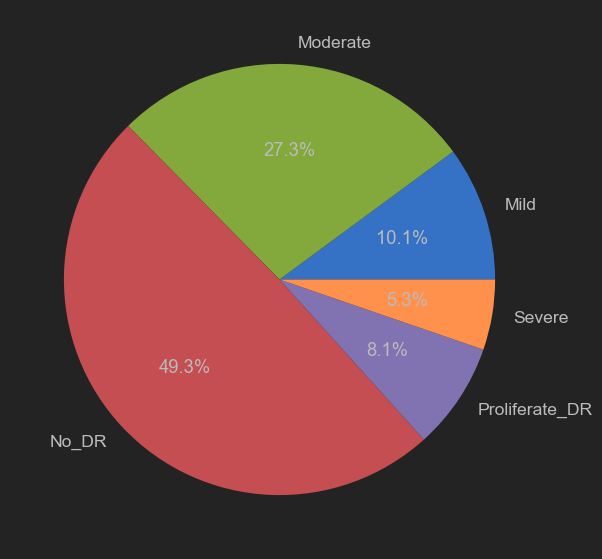

In [29]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show



In [30]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [31]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.60      0.45      0.51        74
      Moderate       0.68      0.77      0.73       185
         No_DR       0.90      0.99      0.94       379
Proliferate_DR       0.51      0.45      0.48        53
        Severe       1.00      0.07      0.13        42

      accuracy                           0.79       733
     macro avg       0.74      0.55      0.56       733
  weighted avg       0.79      0.79      0.77       733



Text(0.5, 1.0, 'Confusion_matrix')

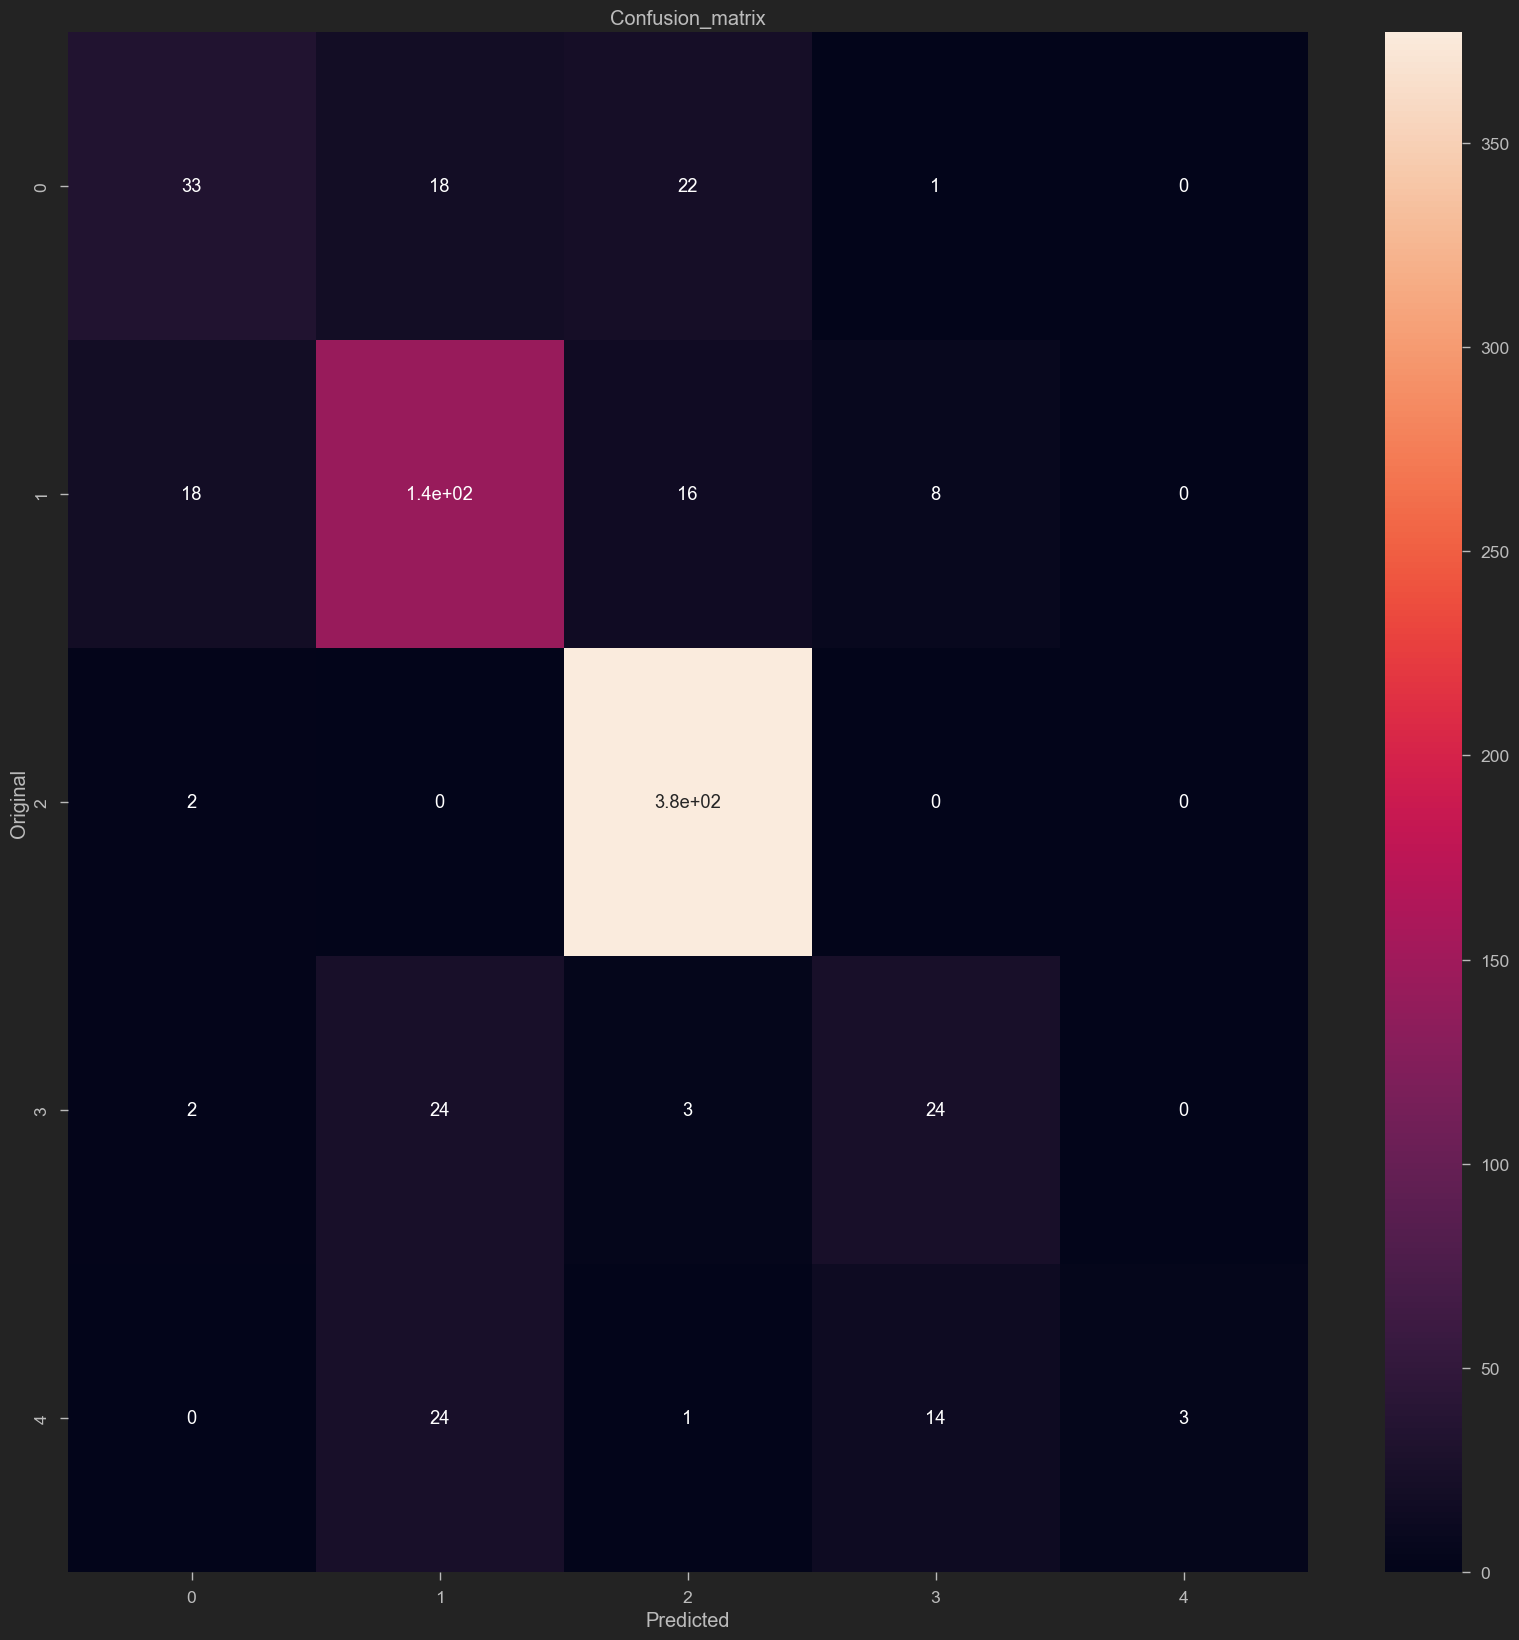

In [32]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


In [40]:
y_pred = model.predict(test_generator)  # X_test should contain your test data
y_true = np.argmax(y_test, axis=1)  # y_test should contain true labels in one-hot encoded format


23/23 [==============================] - 22s 928ms/step


In [39]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming you have a list of labels, for example:
labels = [0, 1, 2, 1, 0, 3, 2]

# Convert labels to one-hot encoding
y_test= to_categorical(labels, num_classes=4)

print(y_test)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [41]:
# Calculate Sensitivity and Specificity
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

ValueError: Found input variables with inconsistent numbers of samples: [7, 733]